# Import Library

In [1]:
import numpy as np
import pandas as pd

import math
import statistics
import scipy.stats

# Import Data

## Mengambil dan Membaca data

In [2]:
# Mengambil
df = pd.read_csv('nyc-rolling-sales.csv')

Pada Assignment 2 ini kita mengambil data dari link "https://www.kaggle.com/datasets/new-york-city/nyc-property-sales" yang berjudul NYC Property Sales (A year's worth of properties sold on the NYC real estate market)

In [3]:
# Membaca
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data Understanding 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
df.shape

(84548, 22)

# Data Cleansing

In [6]:
# Mecngecek data yang bernilai null
df.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [7]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

# Data Preprocessing

Pada Data ini kolom **EASE-MENT** & **Unnamed: 0** akan dihapus (**DROP**) karena kolom EASE-MENT tidak ada nilai dan kolom Unnamed: 0 tidak diperlukan.

In [8]:
# Menghapus Kolom EASE-MENT dan Unnamed:0
df_fix = df.drop(["EASE-MENT", "Unnamed: 0"], axis=1)

# Mengecek Data
df_fix.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [10]:
df_fix.shape

(84548, 20)

In [11]:
# Mengelompokkan data dan mengubah tipe data menjadi category
data_object_category = [
    "NEIGHBORHOOD", 
    "BUILDING CLASS CATEGORY", 
    "TAX CLASS AT PRESENT",
    "BLOCK",
    "LOT",
    "BUILDING CLASS AT PRESENT",
    "ADDRESS",
    "APARTMENT NUMBER",
    "BUILDING CLASS AT TIME OF SALE",
]
for data in data_object_category:
    df_fix[data] = df_fix[data].astype('category')
    
# Mengelompokkan data dan mengubah tipe data menjadi numeric
data_object_numeric = [
    "SALE PRICE",
    "LAND SQUARE FEET",
    "GROSS SQUARE FEET",
]
for data in data_object_numeric:
    df_fix[data] = pd.to_numeric(df_fix[data], errors='coerce')
    
# Mengubah tipe data kolom SLAE DATE
df_fix["SALE DATE"] = pd.to_datetime(df_fix["SALE DATE"])

# Mengubah tipe data BOROUGH menjadi string dan memberi nama
df_fix["BOROUGH"] = df_fix["BOROUGH"].astype(str)
df_fix["BOROUGH"].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

In [12]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  category      
 8   APARTMENT NUMBER                84548 non-null  category      
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [13]:
df_fix.describe()

,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [14]:
# Mengecek nilai null
df_fix.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [15]:
# Mengisi nilai null dengan MEAN
df_fix['LAND SQUARE FEET'].fillna(df_fix['LAND SQUARE FEET'].mean(), inplace=True)
df_fix['GROSS SQUARE FEET'].fillna(df_fix['GROSS SQUARE FEET'].mean(), inplace=True)
df_fix['SALE PRICE'].fillna(df_fix['SALE PRICE'].mean(), inplace=True)

In [16]:
df_fix.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [17]:
df_fix.describe()

,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,8.454800e+04,84548.000000,84548.000000,8.454800e+04
mean,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,1290.879147,16.721037,8.713183,18.972584,3.486182e+04,2.874826e+04,537.344993,0.819341,1.037675e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.348000e+03,1920.000000,1.000000,3.000000e+05
50%,11209.000000,1.000000,0.000000,1.000000,3.200000e+03,2.520000e+03,1940.000000,2.000000,6.700000e+05
75%,11357.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,2.000000,1.276456e+06
max,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


## Mean

In [18]:
avg_borough = df_fix.groupby('BOROUGH')['SALE PRICE'].mean()
avg_borough = avg_borough.to_frame()
avg_borough.rename(columns = {"SALE PRICE": "Sale Price Average"}, inplace=True)
avg_borough

,Sale Price Average
BOROUGH,
Bronx,5.901936e+05
Brooklyn,8.344884e+05
Manhattan,2.902477e+06
Queens,9.063757e+05
Staten Island,7.525600e+05


**Keterangan**

Data diatas dapat didapatkan informasi rata-rata harga penjualan pada wilayah :<br>
* Bronx adalah 590193.6<br>
* Brooklyn adalah 834488.4<br>
* Manhattan adalah 2902477<br>
* Queens adalah 906375.7<br>
* Staten Island adalah 752560<br>

## Median

In [19]:
med_borough = df_fix.groupby('BOROUGH')['YEAR BUILT'].median()
med_borough = med_borough.to_frame()
med_borough.rename(columns = {"YEAR BUILT": "Year Built Median"}, inplace=True)
med_borough

,Year Built Median
BOROUGH,
Bronx,1932.0
Brooklyn,1930.0
Manhattan,1938.0
Queens,1945.0
Staten Island,1973.0


**Keterangan**

Data diatas dapat didapatkan informasi median tahun dibangun pada  wilayah :<br>
* Bronx adalah 1932<br>
* Brooklyn adalah 1932<br>
* Manhattan adalah 1932<br>
* Queens adalah 1932<br>
* Staten Island adalah 1973<br>

## Mode

In [20]:
mod_borough = df_fix.groupby('BOROUGH').apply(pd.DataFrame.mode)['BUILDING CLASS CATEGORY']
mod_borough = mod_borough.to_frame()
mod_borough.rename(columns={"BUILDING CLASS CATEGORY": "Building Class Category Mode"}, inplace=True)
mod_borough

,,Building Class Category Mode
BOROUGH,,
Bronx,0,02 TWO FAMILY DWELLINGS
Brooklyn,0,02 TWO FAMILY DWELLINGS
Manhattan,0,13 CONDOS - ELEVATOR APARTMENTS
Queens,0,01 ONE FAMILY DWELLINGS
Staten Island,0,01 ONE FAMILY DWELLINGS


**Keterangan**

Data diatas dapat didapatkan informasi modus kategori kelas bangunan pada wilayah :<br>
* Bronx adalah 02 TWO FAMILY DWELLINGS<br>
* Brooklyn adalah 02 TWO FAMILY DWELLINGS<br>
* Manhattan adalah 13 CONDOS - ELEVATOR APARTMENTS<br>
* Queens adalah 01 ONE FAMILY DWELLINGS<br>
* Staten Island adalah 01 ONE FAMILY DWELLINGS<br>

## Sum

In [21]:
sum_borough = df_fix.groupby('BOROUGH')['TOTAL UNITS'].sum()
sum_borough = sum_borough.to_frame()
sum_borough.rename(columns={"TOTAL UNITS": "Total Units Sum"}, inplace=True)
sum_borough

,Total Units Sum
BOROUGH,
Bronx,25403
Brooklyn,53400
Manhattan,48504
Queens,51841
Staten Island,11016


**Keterangan**

Data diatas dapat didapatkan informasi jumlah total units pada wilayah :<br>
* Bronx adalah 25403<br>
* Brooklyn adalah 53400<br>
* Manhattan adalah 53400<br>
* Queens adalah 51841<br>
* Staten Island adalah 51841<br>

## Range

In [22]:
range_borough = df_fix.groupby('BOROUGH')['TOTAL UNITS'].agg(np.ptp)
range_borough = range_borough.to_frame()
range_borough.rename(columns = {"TOTAL UNITS": "Total Units Range"}, inplace=True)
range_borough

,Total Units Range
BOROUGH,
Bronx,955
Brooklyn,889
Manhattan,1653
Queens,2261
Staten Island,143


**Keterangan**

Data diatas dapat didapatkan informasi rentang total units pada wilayah :<br>
* Bronx adalah 955<br>
* Brooklyn adalah 889<br>
* Manhattan adalah 1653<br>
* Queens adalah 2261<br>
* Staten Island adalah 143<br>

## Variance

In [23]:
var_borough = df_fix.groupby('BOROUGH')['TOTAL UNITS'].var()
var_borough = var_borough.to_frame()
var_borough.rename(columns = {"TOTAL UNITS": "Total Units Variance"}, inplace=True)
var_borough

,Total Units Variance
BOROUGH,
Bronx,576.031263
Brooklyn,75.907229
Manhattan,543.256962
Queens,542.436937
Staten Island,9.045604


**Keterangan**

Data diatas dapat didapatkan informasi variasi total units pada wilayah :<br>
* Bronx adalah 576.031263<br>
* Brooklyn adalah 576.031263<br>
* Manhattan adalah 543.256962<br>
* Queens adalah 542.436937<br>
* Staten Island adalah 9.045604<br>

## Standard Deviation

In [24]:
std_borough = df_fix.groupby('BOROUGH')['TOTAL UNITS'].std()
std_borough = std_borough.to_frame()
std_borough.rename(columns = {"TOTAL UNITS": "Total Units Standard Deviation"}, inplace=True)
std_borough

,Total Units Standard Deviation
BOROUGH,
Bronx,24.000651
Brooklyn,8.712475
Manhattan,23.307873
Queens,23.290276
Staten Island,3.007591


**Keterangan**

Data diatas dapat didapatkan informasi standar deviasi total units pada wilayah :<br>
* Bronx adalah 24.000651<br>
* Brooklyn adalah 8.712475<br>
* Manhattan adalah 23.307873<br>
* Queens adalah 23.290276<br>
* Staten Island adalah 3.007591<br>

# Probability Distribution

## Normal Distribution

Dalam membuat Nomral Distribution diperlukan normally distributed random variable menggunakan scipy.stats module yaitu norm.rvs() . Argumen loc sesuai dengan rata-rata distribusi, scale sesuai dengan standard deviation dan size sesuai dengan jumlah variasi acak.

In [25]:
print("Rata-rata:", df_fix['TOTAL UNITS'].mean(),"\n" "Standard deviation:",df_fix['TOTAL UNITS'].std(),"\n" "Size:", df_fix.shape[0])

Rata-rata: 2.249183895538629 
Standard deviation: 18.972584432023222 
Size: 84548


C:\Users\Fachri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


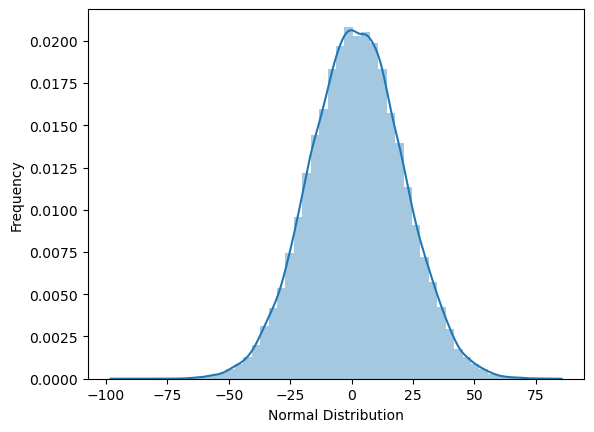

In [53]:
#Import modul normal dari library scipy.stats
from scipy.stats import norm
#Import modul seaborn dan diberi nama sns
import seaborn as sns
#Import matplotlib.pyplot dan diberi nama plt
import matplotlib.pyplot as plt

dis_norm = norm.rvs(loc=2, scale=19, size=84548)

sns.distplot(dis_norm)
plt.xlabel('Normal Distribution')
plt.ylabel('Frequency')
plt.show()



## Uniform Distribution

Dalam membuat Nomral Distribution diperlukan normally distributed random variable menggunakan scipy.stats module yaitu uniform.rvs() . Argumen loc sesuai dengan rata-rata distribusi, scale sesuai dengan standard deviation dan size sesuai dengan jumlah variasi acak.

C:\Users\Fachri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


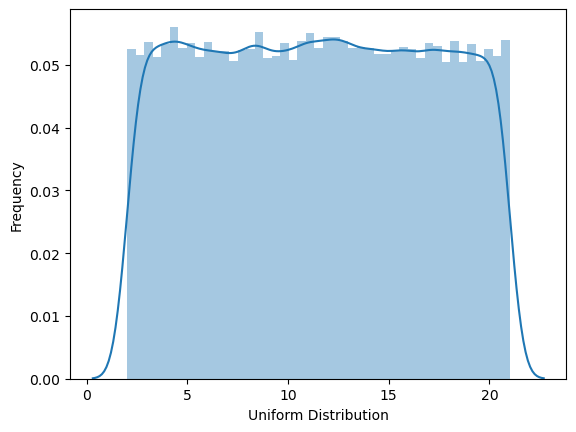

In [55]:
#Import modul uniform dari library scipy.stats
from scipy.stats import uniform
#Import modul seaborn dan diberi nama sns
import seaborn as sns
#Import matplotlib.pyplot dan diberi nama plt
import matplotlib.pyplot as plt

dis_norm = uniform.rvs(loc=2, scale=19, size=84548)

sns.distplot(dis_norm)
plt.xlabel('Uniform Distribution')
plt.ylabel('Frequency')
plt.show()



# Confident Intervals

total unit wilayah brooklyn dan queens

In [27]:
Tot_bro_que = df_fix.groupby("BOROUGH").agg({"TOTAL UNITS": [np.mean, np.std, np.size]})
Tot_bro_que

TOTAL UNITS                  
                     mean        std   size
BOROUGH                                    
Bronx            3.603774  24.000651   7049
Brooklyn         2.220651   8.712475  24047
Manhattan        2.649623  23.307873  18306
Queens           1.938996  23.290276  26736
Staten Island    1.309869   3.007591   8410

In [28]:
Tot_bro_que.loc[["Brooklyn", "Queens"]]

TOTAL UNITS                  
                mean        std   size
BOROUGH                               
Brooklyn    2.220651   8.712475  24047
Queens      1.938996  23.290276  26736

In [29]:
z = 1.96             #z-score from the z table mentioned before

In [30]:
mean_bro = 2.220651  #mean Total Units of Brooklyn
std_bro = 8.712475   #standard deviation for Brooklyn population
n_bro = 24047        #Total number of Brooklyn

In [31]:
se_bro = std_bro / np.sqrt(n_bro)
se_bro

0.05618379790388879

In [32]:
lower_bro = mean_bro - z* se_bro  #lower limit of the CI Brooklyn
upper_bro = mean_bro + z* se_bro  #upper limit of the CI Brooklyn
print("Confident Intervals Total Units Brooklyn adalah", lower_bro, "dan", upper_bro)

Confident Intervals Total Units Brooklyn adalah 2.110530756108378 dan 2.3307712438916224


In [33]:
mean_que = 1.938996  #mean Total Units of Queens
std_que = 23.290276  #standard deviation for Queens population
n_que = 26736        #Total number of Queens

In [34]:
se_que = std_que / np.sqrt(n_que)
se_que

0.14243818099023414

In [57]:
lower_que = mean_que - z* se_que  #lower limit of the CI Queens
upper_que = mean_que + z* se_que  #upper limit of the CI Queens
print("Confident Intervals Total Units Brooklyn adalah", lower_que, "dan", upper_que)

Confident Intervals Total Units Brooklyn adalah 1.659817165259141 dan 2.218174834740859


# Hypothesis Testing

Hyptohesis :
Uji apakah rata-rata Total units di wilayah Brooklyn lebih besar dari pada rata-rata Total units di wilayah Queens

h0 = rata-rata Total units di wilayah Brooklyn tidak lebih besar dari pada di wilayah Queens<br>
h1 = rata-rata Total units di wilayah Brooklyn  lebih besar dari pada di wilayah Queens

h0 : meanB <= meanQ<br>
h1 : meanB > meanQ

In [59]:
#mean, standar deviasi, jumlah data
Tot_bro_que.loc[["Brooklyn", "Queens"]]

TOTAL UNITS                  
                mean        std   size
BOROUGH                               
Brooklyn    2.220651   8.712475  24047
Queens      1.938996  23.290276  26736

In [71]:
Brooklyn = df_fix[df_fix.BOROUGH=='Brooklyn']
Queens = df_fix[df_fix.BOROUGH=='Queens']


In [72]:
import statsmodels.api as sm # digunakan untuk menguji hipotesis

In [79]:
# Karena confidence level 95% maka alpha = 0.05
alpha = 0.05

In [85]:
tot_unit_hipo = sm.stats.ztest(Brooklyn['TOTAL UNITS'],Queens['TOTAL UNITS'], alternative='larger')
tot_unit_hipo

(1.7673816804093043, 0.03858216443195496)

pValue = 0.03858216443195496

In [89]:
if tot_unit_hipo[1]>alpha:
    print('Hipotesis nol (h0) diterima yang berarti rata-rata Total units di wilayah Brooklyn tidak lebih besar dari pada di wilayah Queens')
else:
    print('Hipotesis nol (h0) ditolak yang berarti rata-rata Total units di wilayah Brooklyn lebih besar dari pada di wilayah Queens ')

Hipotesis nol (h0) ditolak yang berarti rata-rata Total units di wilayah Brooklyn lebih besar dari pada di wilayah Queens 
